## Why Do Some Songs Become Popular?

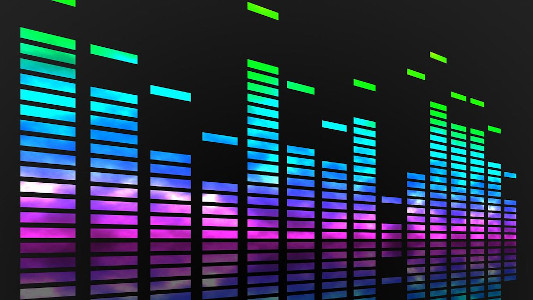

- [Introduction](#0)
- [Feature explanations](#1)
- [Import Libraries](#2)
- [Data Preparation and Analysis](#3)
    * [Cleaning the data](#3a)
    * [Analysis](#3b)
    * [Feature Engineering](#3c)
- [Models](#4a)
    * [Logistic Regression](#4)
    * [Ridge and Lasso Regression](#5)
    * [KNN Algorithm](#6)
    * [SVM](#7)
    * [Naive Bayes](#8)
    * [Decision Tree Classifier](#9)
    * [Random Forest Classifier](#10)
    * [Feature Importance](#11)
    * [Comparison Of Performance](#12)
    * [Conclusion](#13)


<a id="0"></a> <br>

> ## Introduction
- Currently, being able to predict that something might be popular beforehand is an important research subject for every industry. It also has recently became a very important subject for the growing and competitive music industry as well. Since wide use of digital music platforms (Spotify, Billboard, Lastfm), data can be easily reached and the listening behaviors of the listeners can be easily observed. This provides convenience in forecasting techniques and it is also frequently used in recommendation systems.

# <a id="1"></a> <br>
> ## Feature Explanations
- Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .
- duration_ms: The duration of the track in milliseconds.
- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
- instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
- audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- song_popularity: Song ratings of spotify audience.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

<a id="2"></a> 
## Import Libraries

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")

 <a id="3"></a> 
 ## Data Preparation and Analysis

In [5]:
#load the data
spotify_song_data= pd.read_csv("song_data.csv")
spotify_song_info= pd.read_csv("song_info.csv") 

In [6]:
song_info=spotify_song_info.copy()

In [7]:
song_data=spotify_song_data.copy()
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [8]:
song_data.shape

(18835, 15)

 <a id="3a"></a> 
## Cleaning Data

In [9]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [10]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

 <a id="3b"></a> 
## Analysis

In [11]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [12]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [13]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [14]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

- Checked popularity rating of songs that have been popular in the last 10 years in Spotify and took the mean value of them (66.5) . According to this value, the songs has above this rating could remain on the top lists for a long time. If song_popularity is higher than 66.5 (this is about 30% percent of data) we labeled it "1" and if is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

In [15]:
#popular songs' data
a=song_data[song_data["popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.00000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.0
mean,76.992292,218539.555515,0.210354,0.659758,0.658601,0.022390,5.11782,0.174400,-6.624852,0.618829,0.106247,120.753878,3.974307,0.520436,1.0
std,8.068717,48620.048311,0.246079,0.147652,0.187495,0.115572,3.65752,0.137557,3.139341,0.485719,0.102181,27.737971,0.255771,0.230911,0.0
min,67.000000,67000.000000,0.000009,0.072200,0.002890,0.000000,0.00000,0.021500,-34.255000,0.000000,0.022400,57.178000,1.000000,0.035200,1.0
25%,71.000000,190185.000000,0.026300,0.562000,0.541000,0.000000,1.00000,0.092000,-7.906000,0.000000,0.039100,98.883000,4.000000,0.336000,1.0
50%,75.000000,212429.000000,0.106000,0.668000,0.680000,0.000000,5.00000,0.121000,-5.985000,1.000000,0.059100,119.886000,4.000000,0.511000,1.0
75%,82.000000,240533.000000,0.300000,0.765000,0.802000,0.000118,8.00000,0.203000,-4.626000,1.000000,0.131000,139.910000,4.000000,0.701000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.00000,0.978000,-0.739000,1.000000,0.733000,212.058000,5.000000,0.980000,1.0


In [16]:
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


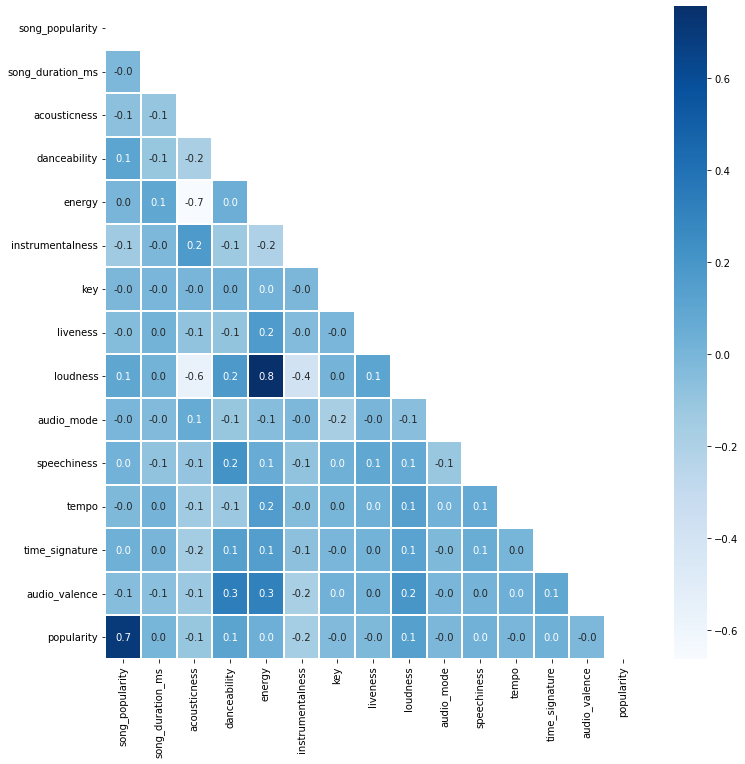

In [17]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

- Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 which is moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. Accusticness,danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness has 0.20.

## Categorical Variable Analysis

In [18]:
def bar_plot(variable):
    
    var=song_data[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))


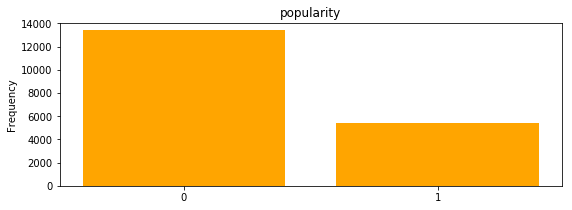

popularity:
0    13386
1     5449
Name: popularity, dtype: int64


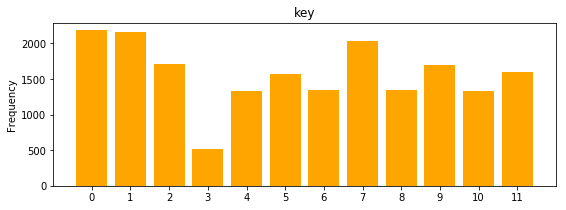

key:
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: key, dtype: int64


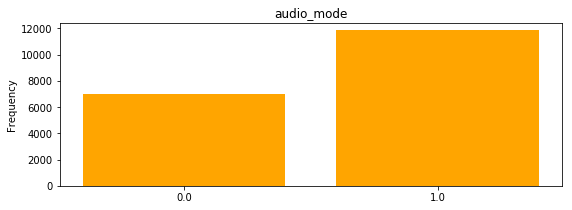

audio_mode:
1.0    11831
0.0     7004
Name: audio_mode, dtype: int64


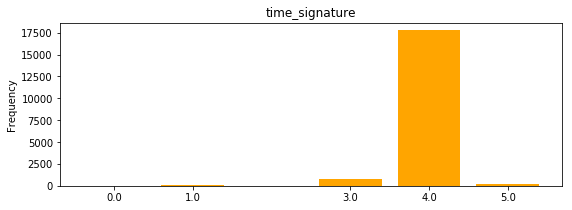

time_signature:
4.0    17754
3.0      772
5.0      233
1.0       73
0.0        3
Name: time_signature, dtype: int64


In [19]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [20]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58,351400.0,0.6520,0.555,0.331,0.000012,9,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437,0
253,Whole Lotta Love,77,333893.0,0.0484,0.412,0.902,0.131000,9,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422,1
501,Do You Feel Like We Do,48,836666.0,0.0439,0.295,0.568,0.011700,0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49,348560.0,0.6300,0.393,0.416,0.007910,9,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512,0
1113,November Rain,38,537506.0,0.0165,0.197,0.629,0.279000,11,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8,102661.0,0.9230,0.679,0.311,0.721000,0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304,0
16642,same stars,46,116918.0,0.2510,0.687,0.284,0.862000,0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159,0
17723,Dutch Spring,0,205623.0,0.1960,0.510,0.843,0.135000,6,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832,0
3720,Racism And Injustice,21,260160.0,0.9220,0.650,0.316,0.000000,9,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306,0


In [21]:
# drop outliers
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)

In [22]:
song_data[song_data["audio_mode"].isnull()]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity


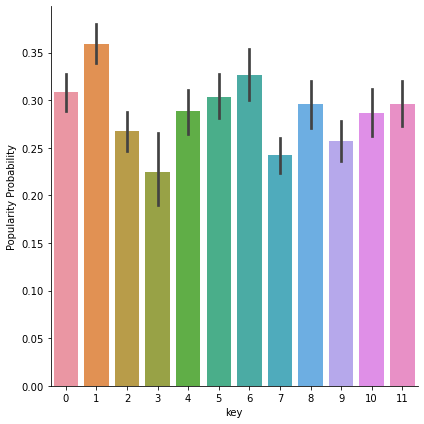

In [23]:
g = sns.factorplot(x = "key", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

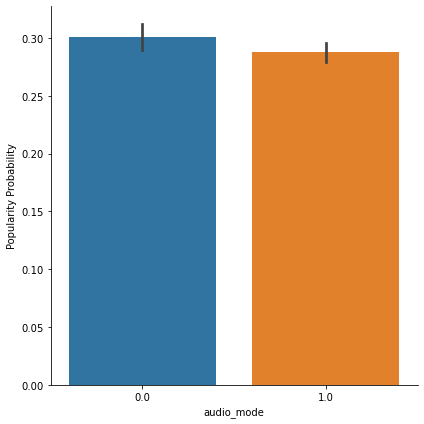

In [24]:
g = sns.factorplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

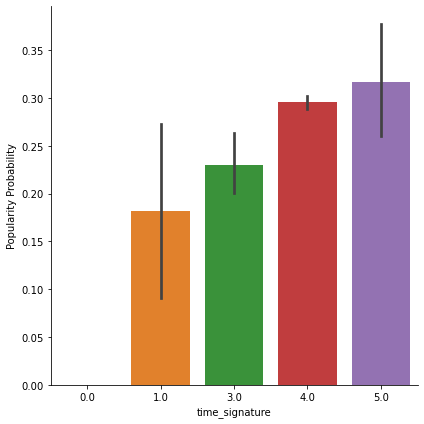

In [25]:
g = sns.factorplot(x = "time_signature", y = "popularity", data = song_data, kind = "bar", size = 6)
g.set_ylabels("Popularity Probability")
plt.show()

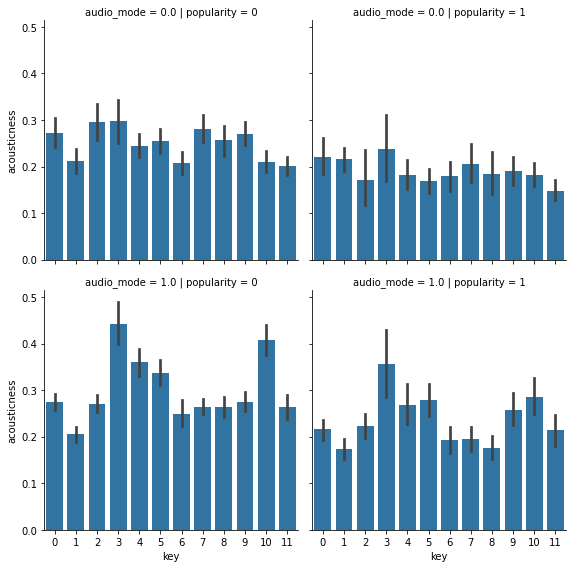

In [26]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity", size = 4)
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

> ## Features Distribution


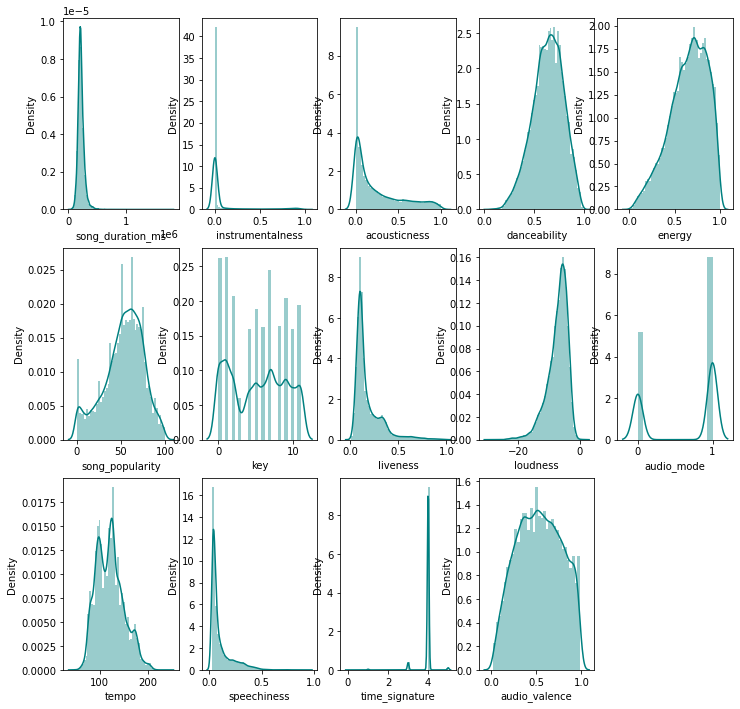

In [27]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

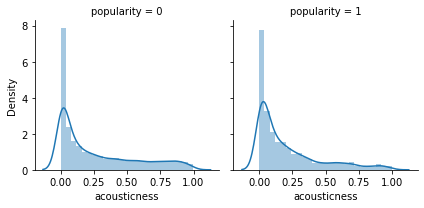

In [29]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

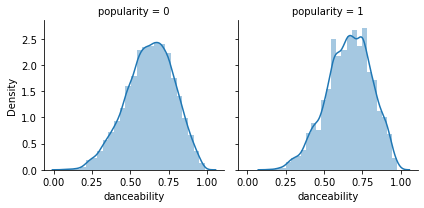

In [30]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

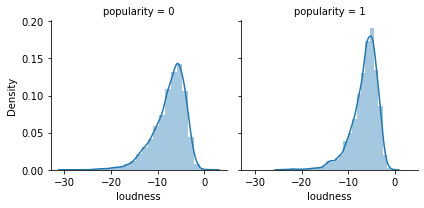

In [31]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

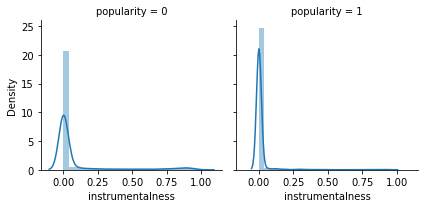

In [32]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

- Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
- According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
- Keys like 0,1,5,6 and 11 seems more effective in songs. And if key== 0 or 1 or 6 song has more chance to be populer.
- Time_signure is mostly 4 and 5 in both populer and general data.
- If danceability>0.6 song has more chance to be popular.
- If loudness > -10 song has more chance to be popular.


 <a id="3c"></a> 
## Feature Engineering

In [33]:
spotify_song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in spotify_song_data.song_popularity ]
spotify_song_data["popularity"].value_counts()

0    13386
1     5449
Name: popularity, dtype: int64

In [34]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)
data_plr.head()

,popularity,song_name
0,1,Boulevard of Broken Dreams
1,0,In The End
2,1,Seven Nation Army
3,1,By The Way
4,0,How You Remind Me


In [35]:
song_data['song_name'].value_counts(dropna=False)
song_data['song_name'].dropna(inplace=True)

<a id="4a"></a> <br>
## Models

In [36]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

In [37]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [38]:
#fill nan values
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [39]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [40]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [41]:
#data preparation
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train
x_test = x_test
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (14808, 13)
x_test:  (3702, 13)
y_train:  (14808,)
y_test:  (3702,)


<a id="6"></a> <br>
**KNN Algorithm**

In [44]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0 ... 0 0 0]


In [45]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train,y_train))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test,y_test))

With KNN (K=3) train accuracy is:  0.9943949216639654
With KNN (K=3) test accuracy is:  0.7963263101026472


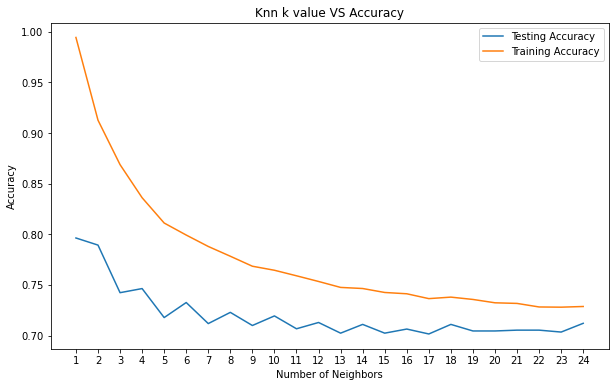

Best accuracy is 0.7963263101026472 with K = 1


In [46]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train, y_train))
    test_accuracy.append(knn.score(x_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [47]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(knn,x_train,y_train,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.70560432 0.71708305 0.70391627 0.70786896 0.70618034]
Cross_val scores average:  0.7081305907702679


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

df_knn = pd.DataFrame({'Y_test': y_test , 'Y_pred': y_pred})
df_knn

,Y_test,Y_pred
12538,0,0
14044,1,1
290,1,1
16596,0,1
5207,0,0
...,...,...
4949,0,0
1430,0,0
5524,1,1
11953,0,0


In [49]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn
accuracy_score(y_test,y_pred)

0.717720151269584

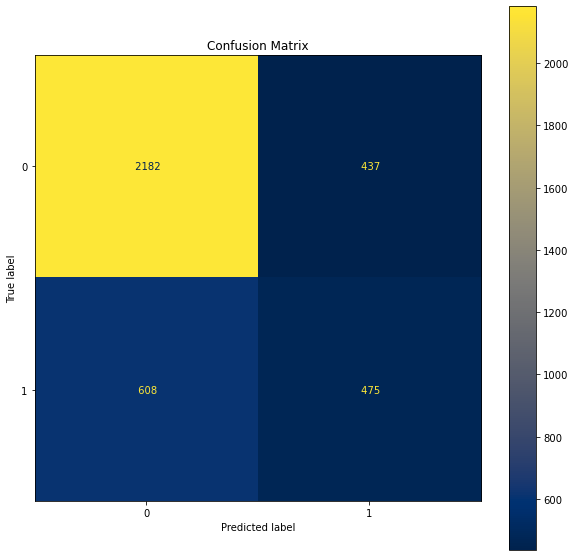

In [50]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(knn, x_test,y_test, values_format=' ',ax=ax,cmap='cividis') 
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

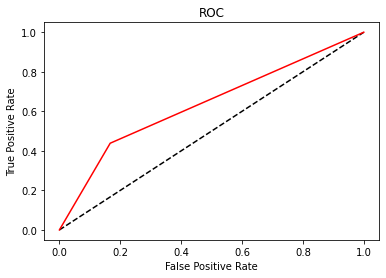

In [51]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

<a id="7"></a> <br>
**SVM**

- SVM is an effective and simple method mostly used in classification problems. The aim of the SVM algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points. C and Gamma are the parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel.

In [52]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.7071853052404106
Test accuracy of svm algo: 0.7074554294975689


In [53]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.70695476 0.70729237 0.70729237 0.70719352 0.70719352]
Cross_val scores average:  0.7071853063491836


In [54]:
SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm

[[2619    0]
 [1083    0]]


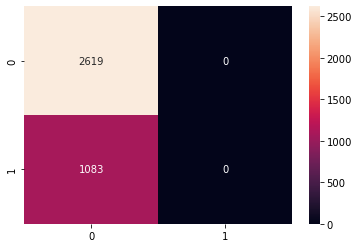

In [61]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

svc_model = SVC()
svc_model.fit(x_train,y_train)
predictions = svc_model.predict(x_test)
svmm=confusion_matrix(y_test,predictions)
print(svmm)
sns.heatmap(svmm,annot=True,fmt="d") 
plt.show()

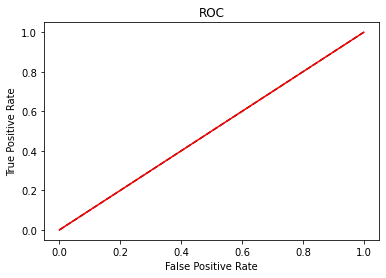

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

<a id="9"></a> <br>
**Decision Tree Classifier**

In [67]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Train ccuracy of decision tree: 0.9953403565640194
Test accuracy of decision tree: 0.8003781739600216


In [68]:
from sklearn.model_selection import cross_val_score
k =5
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.77920324 0.79101958 0.77548953 0.76663289 0.78858494]
Cross_val scores average:  0.7801860376658888


[[2163  456]
 [ 283  800]]


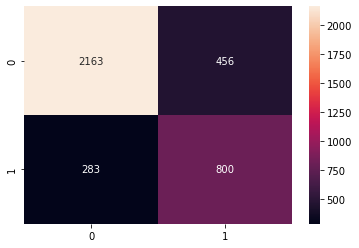

In [69]:
dtt=confusion_matrix(y_test,y_pred)
print(dtt)
sns.heatmap(dtt,annot=True,fmt="d") 
plt.show()

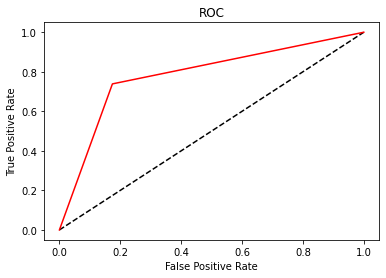

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

> <a id="10"></a> <br>
**Random Forest Classifier**
- RF is one of the most popular ensemble learning method in machine learning not only gives good results even without hyperparameter optimization but also can use both classification and regression problems. But the common problem of the traditional decision trees is over-fitting. In order to avoid overfitting, random forest models select and train hundreds of different sub-samples (multiple deep decision trees) randomly and reduce the variance. We used 100 estimators and random state 3 gave the about % 89 accuracy. 

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
print("Train ccuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test

Train ccuracy of random forest 0.9953403565640194
Test accuracy of random forest 0.8892490545651


In [75]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.87002026 0.87778528 0.86428089 0.85883148 0.86828774]
Cross_val scores average:  0.8678411289140096


In [76]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

**Confusion Matrix with Random Forest**

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[2558   61]
 [ 352  731]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2619
           1       0.92      0.67      0.78      1083

    accuracy                           0.89      3702
   macro avg       0.90      0.83      0.85      3702
weighted avg       0.89      0.89      0.88      3702



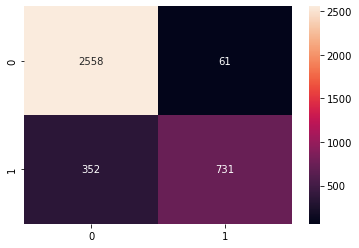

In [78]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

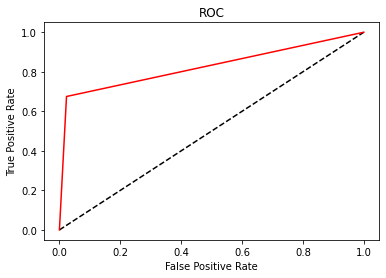

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

- Since we set our threshold such that 70% of the songs in our dataset are named as not popular and 30% are named as popular, 70% accuracy can be achieved by predicting all 0s. In order to capture this, we should consider the precision and recall values. As we see in confusion matrix, model predicted “695 popular” songs and “2596 unpopular” songs correct.


<a id="12"></a> <br>
## Comparison Of Performance

In [80]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','SVM','DesicionTreeClassifier','K-NearestNeighbors'],
                                 'Accuracy':[RandomForestClassifier_score,SVM_score,DecisionTree_score,KKN_Score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.889249
2,DesicionTreeClassifier,0.800378
3,K-NearestNeighbors,0.796326
1,SVM,0.707455


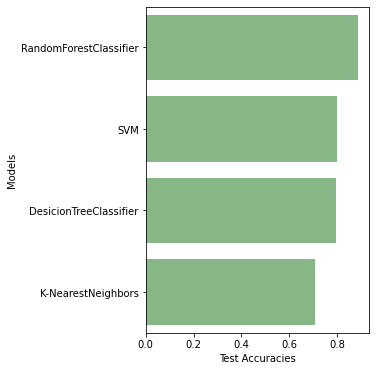

In [81]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()


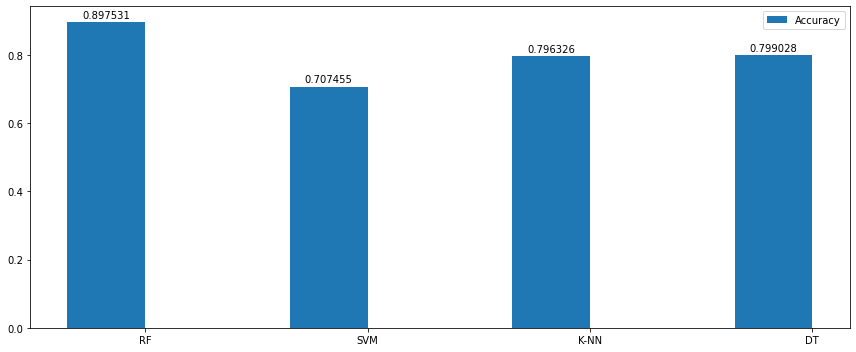

In [82]:
labels = ['RF','SVM', 'K-NN', 'DT']
accuracy = [0.897531,0.707455, 0.796326,0.799028]


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(x - width/2,accuracy, width, label='Accuracy')


ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)

fig.tight_layout()
plt.show()

In [85]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
df = pd.read_csv('data_i.csv')
df.head()
df_new = df.drop(['artists','duration_ms','explicit','key','mode','release_date','name','popularity','year'],axis=1)

df_new.head()
df_new['loudness'] = df_new['loudness']+60
df_new['loudness'] = df_new['loudness']/63.855
df_new['tempo'] = df_new['tempo']/244.091
df_new.index = df_new['id']
df_new = df_new.drop(['id'],axis=1)

df_new.head()
import sklearn.metrics 
model_knn = NearestNeighbors(algorithm='kd_tree',n_neighbors=5)
mat_songs = csr_matrix(df_new.values)
model_knn.fit(mat_songs)
def recommend(idx, model, number_of_recommendations=5):
    query = df_new.loc[idx].to_numpy().reshape(1,-1)
    print('Searching for recommendations...')
    distances, indices = model.kneighbors(query,n_neighbors = number_of_recommendations)
    
    for i in indices:
        print(df[['name','artists']].loc[i].where(df['id']!=idx).dropna())
#Tester

name = input('Enter song title: ')
print('Search results: ')
print(df[['artists','name']].where(df['name'] == name).dropna())

ind = int(input('Enter the index value of the required song: '))
idx = df['id'].loc[ind]

song = df['name'].loc[ind]
artists = df['artists'].loc[ind]

print('Song selected is ', song, 'by', artists)

nor = int(input('Enter number of recommendations: '))

recommend(idx, model_knn, nor)


Enter song title: perfect
Search results: 
Empty DataFrame
Columns: [artists, name]
Index: []
Enter the index value of the required song: 3456
Song selected is  Witch On Roof - Extended Version by ['MGM Studio Orchestra']
Enter number of recommendations: 5
Searching for recommendations...
                                                    name  \
61527  String Quartet No. 2 in G Major, Op. 18: II. A...   
3442                Threatening Witch - Extended Version   
58249          Werther, Acte I: Prélude... Assez! Assez!   
44663                          In The Still Of The Night   

                                                 artists  
61527  ['Ludwig van Beethoven', 'Budapest String Quar...  
3442                            ['MGM Studio Orchestra']  
58249  ['Ninon Vallin', 'Georges Thill', 'Germaine Fé...  
44663                                    ['Ray Conniff']  


<a id="13"></a> <br>
## Conclusion

First we tried to predict popular songs using audio features then we added song name texts’ polarity to it and tried to improve our model. We also fitted the model using each importance as a threshold. Although accusticness is the most important of these features did not lead us to a strong result.  
We had 18835 songs available. Decision Tree algorithms which mainly given better results when we don’t have so much data got the best result with RF. There were no strong linear correlations in our data, so linear methods did not fit well. In LR, We built the model using the gradient decent and this gave the best result in 200 iterations which was a moderate result. As in many popularity studies, we achieved the second best result with SVM. Adding Polarity to features value has almost not changed the result at all .
For the future work, the following questions can be asked. Nowadays, the industrialization of popular music has became more common all over the world and most musicians are using computers when they create their songs. So are songs started to be more similar and less unique? Does these affect our predictions in a positive way? With industrialization, prediction of the popular and trendy items are getting easier? Could the prediction increase if we had data with all the songs are created by a computer?